# “Arithmetic”

(산술)이라는 용어는 기본적인 수학 연산을 의미합니다.

수학의 기초 개념으로, 일상적인 계산에서부터 고급 프로그래밍 및 데이터 분석에 이르기까지 폭넓게 사용됩니다.

아래는 산술 연산의 기본 개념과 주요 내용입니다.

In [1]:
import cv2
import numpy as np

In [2]:
np.uint8(0)

0

In [3]:
np.uint8(256)

C:\Users\acy\AppData\Local\Temp\ipykernel_16372\1789329364.py:1: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 256 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)`
will give the desired result (the cast overflows).
  np.uint8(256)


0

In [4]:
np.uint16(257)

257

In [5]:
a = np.uint8([[200, 50]]) 
b = np.uint8([[100, 100]])

In [6]:
256-20

236

In [7]:
print(200*2-256)
print(50*2)

144
100


In [8]:
a*2

array([[144, 100]], dtype=uint8)

In [9]:
a+b

array([[ 44, 150]], dtype=uint8)

In [10]:
import numpy as np
import matplotlib.pylab as plt

In [11]:
# ---① 연산에 사용할 이미지 읽기
img1 = cv2.imread('../img/wing_wall.jpg')
img2 = cv2.imread('../img/yate.jpg')


In [12]:
# ---② 이미지 덧셈
img3 = img1 + img2  # 더하기 연산

# TypeError: unsupported operand type(s) for +:
#     'NoneType' and 'NoneType'

# operand 피연산 함수

# 오류 원인: 파일 경로가 안 맞았음

In [13]:
img4 = cv2.add(img1, img2) # OpenCV 함수

In [14]:
imgs = {'img1':img1, 'img2':img2,
        'img1+img2': img3,
        # 두 이미지를 단순히 더한다
        # 동작 방식: 각 픽셀의 값들을 그대로 더합니다.
        # 이때, 값이 255를 초과하면 자동으로 256으로 나눈 나머지를 반환합니다
        # (모듈로 연산).
        # 결과: 255를 초과하는 경우 값이 래핑(wrap)되면서,
        # 0으로 돌아가거나 작은 값으로 변할 수 있습니다.
        'cv.add(img1, img2)': img4}
        # 오픈 씨브이에서 제공하는 이미지 덧셈 함수
        # 동작 방식: 각 픽셀 값들을 더하되,
        # 255를 초과하는 경우 자동으로 255로 클램핑(clamping)됩니다.
        # 결과: 결과 값이 255를 초과하면, 255로 제한됩니다.
        # 따라서 픽셀 값이 너무 밝아지는 문제를 방지할 수 있습니다.

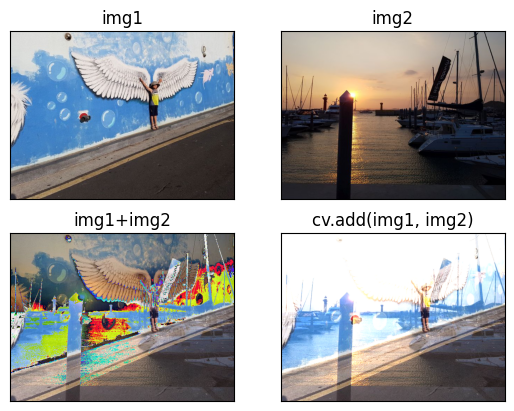

In [15]:
# ---③ 이미지 출력
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,2, i + 1)
    plt.imshow(v[:,:,::-1])
    plt.title(k)
    plt.xticks([]); plt.yticks([])

plt.show()

In [16]:
# 블렌딩을 이용해 이미지 합성

import cv2
import numpy as np

alpha = 0.5 # 합성에 사용할 알파 값
# alpha value 픽셀의 투명도를 나타내는 값
# 0과 1 사이의 값으로 표현된다. 0이 완전히 투명하다
# 값에 따라 다른 이미지와 어떻게 합성될지가 결정된다

#---① 합성에 사용할 영상 읽기
img1 = cv2.imread('../img/wing_wall.jpg')
img2 = cv2.imread('../img/yate.jpg')

# ---② NumPy 배열에 수식을 직접 연산해서 알파 블렌딩 적용
blended = img1 * alpha + img2 * (1-alpha)
blended = blended.astype(np.uint8) # 소수점 발생을 제거하기 위함
cv2.imshow('img1 * alpha + img2 * (1-alpha)', blended)

# ---③ addWeighted() 함수로 알파 블렌딩 적용
dst = cv2.addWeighted(img1, alpha, img2, (1-alpha), 0) 
cv2.imshow('cv2.addWeighted', dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
# 블렌딩을 이용해 이미지 합성

import cv2
import numpy as np

alpha = 0.5 # 합성에 사용할 알파 값
# alpha value 픽셀의 투명도를 나타내는 값
# 0과 1 사이의 값으로 표현된다. 0이 완전히 투명하다
# 값에 따라 다른 이미지와 어떻게 합성될지가 결정된다

#---① 합성에 사용할 영상 읽기
img1 = cv2.imread('../img/taekwonv1.jpg')
img2 = cv2.imread('../img/siro.jpg')

# 두 번째 이미지를 첫 번째 이미지의 크기로 리사이즈
resized_img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# ---② NumPy 배열에 수식을 직접 연산해서 알파 블렌딩 적용
blended = img1 * alpha + resized_img2 * (1-alpha)
blended = blended.astype(np.uint8) # 소수점 발생을 제거하기 위함
cv2.imshow('img1 * alpha + img2 * (1-alpha)', blended)

# ---③ addWeighted() 함수로 알파 블렌딩 적용
dst = cv2.addWeighted(img1, alpha, resized_img2, (1-alpha), 0) 
cv2.imshow('cv2.addWeighted', dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

# ValueError: operands could not be broadcast together
# with shapes (4032,3024,3) (444,400,3) 
# 리사이즈가 필요하다

# 아래 코드로 해결함
# 두 번째 이미지를 첫 번째 이미지의 크기로 리사이즈
# resized_img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

In [18]:
# 트랙바로 이미지 합성 정도 조절하기

import cv2
import numpy as np

win_name = 'Alpha blending'     # 창 이름
trackbar_name = 'fade'          # 트렉바 이름

# ---① 트렉바 이벤트 핸들러 함수
def onChange(x):
    # 트랙바가 움직일 때마다 호출되는 함수
    # x 트랙바의 현재 위치
    alpha = x/100
    dst = cv2.addWeighted(img1, 1-alpha, img2, alpha, 0) 
    # 1-alpha 이미지 1의 가중치 // alpha 이미지 2의 가중치
    # addWeighted 두 이미지에 가중치를 부여하여 혼합한다
    # 두 이미지를 일정 비율로 섞어 새로운 이미지를 생성한다
    # 미지 합성, 트랜지션 효과, 이미지 조정 등의 작업
    cv2.imshow(win_name, dst)

# ---② 합성 영상 읽기
img1 = cv2.imread('../img/happy_icon.png')
img2 = cv2.imread('../img/sad_icon.png')

# ---③ 이미지 표시 및 트렉바 붙이기
cv2.imshow(win_name, img1)
cv2.createTrackbar(trackbar_name, win_name, 0, 100, onChange)

cv2.waitKey()
cv2.destroyAllWindows()

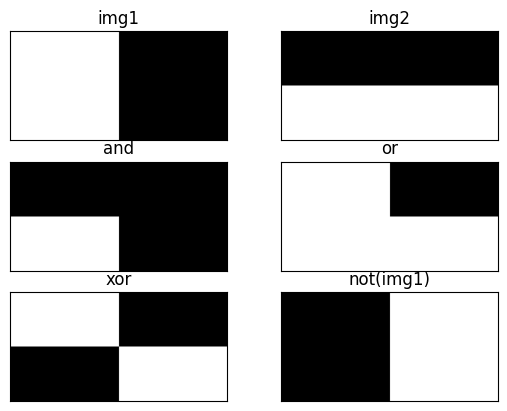

In [19]:
import numpy as np, cv2
import matplotlib.pylab as plt

#--① 연산에 사용할 이미지 생성
img1 = np.zeros( ( 200,400), dtype=np.uint8)
img2 = np.zeros( ( 200,400), dtype=np.uint8)
img1[:, :200] = 255         # 왼쪽은 흰색(255), 오른쪽은 검정색(0)
img2[100:200, :] = 255      # 위쪽은 검정색(0), 아래쪽은 흰색(255)

#--② 비트와이즈 연산
# 이미지에 비트 단위의 연산을 수행
# 특정 마스크를 적용하거나, 두 이미지를 합치거나,
# 특정 영역을 강조하는 등 다양한 이미지 처리 작업
bitAnd = cv2.bitwise_and(img1, img2) # 두 비트가 모두 1
bitOr = cv2.bitwise_or(img1, img2) # 두 비트 중 하나라도 1
bitXor = cv2.bitwise_xor(img1, img2) # 두 비트가 서로 다를 때 결과가 1
bitNot = cv2.bitwise_not(img1) # 단일 비트에서 동작, 비트 값을 반전시킴

#--③ Plot으로 결과 출력
imgs = {'img1':img1, 'img2':img2, 'and':bitAnd, 
          'or':bitOr, 'xor':bitXor, 'not(img1)':bitNot}
# 각 키는 연산 결과를 담고 있다
for i, (title, img) in enumerate(imgs.items()):
    plt.subplot(3,2,i+1) # 여러 플롯을 하나의 figure에 배치
    plt.title(title)
    plt.imshow(img, 'gray')
    plt.xticks([]); plt.yticks([])

plt.show()

In [20]:
import ctypes
# OpenCV 창 이름을 변경하는 함수

def set_window_title(window_name, title):
    # windows api를 사용하여 특정 윈도우의 제목을 변경
    # 윈도우에서 사용할 수 있는 창 핸들을 가져옴
    hwnd = ctypes.windll.user32.FindWindowW(None, window_name)
    # ctypes c 함수를 호출
    # FindWindowW 윈도우 핸들을 찾는 windows api 함수
    if hwnd != 0:
        # 창 이름을 변경
        ctypes.windll.user32.SetWindowTextW(hwnd, title)
        # SetWindowTextW 윈도우 핸들을 지정하여 해당 창의 제목을 변경
        
window_name = 'Test Window'
cv2.imshow(window_name, img1)
set_window_title(window_name, "한글 창 이름")
# 대기 후 창 닫기
cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:
# 비트와이즈 마스킹

import numpy as np, cv2
import matplotlib.pylab as plt

#--① 이미지 읽기
img = cv2.imread('../img/siro.jpg')

mask = np.zeros_like(img)
# 원본 이미지와 같은 크기의 검정색 배열을 생성
# mask 이 배열로 초기화된다
cv2.circle(mask, (150,140), 100, (255,255,255), -1)
#cv2.circle(대상이미지, (원점x, 원점y), 반지름, (색상), 채우기)

#--③ 마스킹
masked = cv2.bitwise_and(img, mask)

#--④ 결과 출력
cv2.imshow('original', img)
cv2.imshow('mask', mask)
cv2.imshow('masked', masked)
cv2.waitKey()
cv2.destroyAllWindows()

In [22]:
# 위치를 지정해서 마스킹하기

import cv2
import numpy as np

# 전역 변수 초기화
drawing = False  # 마우스 드래그 상태
ix, iy = -1, -1  # 마우스 클릭 시작 좌표
radius = 200  # 기본 원 반지름

def mouse_callback(event, x, y, flags, param):
    global ix, iy, drawing, mask, img, radius

    if event == cv2.EVENT_LBUTTONDOWN:
        # 마우스 왼쪽 버튼 클릭 시 시작 좌표 기록
        ix, iy = x, y
        drawing = True

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            # 마우스 이동 중이면 원을 그리기 위해 마스크 업데이트
            mask = np.zeros_like(img)
            cv2.circle(mask, (ix, iy), radius, (255, 255, 255), -1)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        # 마우스 버튼을 떼면 원을 최종적으로 그리기
        mask = np.zeros_like(img)
        cv2.circle(mask, (ix, iy), radius, (255, 255, 255), -1)
        # 마스킹된 이미지 업데이트
        masked = cv2.bitwise_and(img, mask)
        cv2.imshow('masked', masked)

# 이미지 읽기
img = cv2.imread('../img/siro.jpg')

# 마스크를 위한 초기 배열 생성
mask = np.zeros_like(img)

# 창 생성 및 마우스 콜백 설정
cv2.namedWindow('original')
cv2.setMouseCallback('original', mouse_callback)

while True:
    # 원본 이미지 표시
    cv2.imshow('original', img)
    
    # ESC 키로 종료
    if cv2.waitKey(1) & 0xFF == 27:
        break

cv2.destroyAllWindows()


In [23]:
mask = np.zeros_like(img)
mask

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [24]:
import cv2
import numpy as np

#--① 합성에 사용할 영상 읽기, 전경 영상은 4채널 png 파일
img_fg = cv2.imread('../img/opencv_logo.png', cv2.IMREAD_UNCHANGED)
img_bg = cv2.imread('../img/girl.jpg')

#--② 알파채널을 이용해서 마스크와 역마스크 생성
_, mask = cv2.threshold(img_fg[:,:,3], 1, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

#--③ 전경 영상 크기로 배경 영상에서 ROI 잘라내기
img_fg = cv2.cvtColor(img_fg, cv2.COLOR_BGRA2BGR)
h, w = img_fg.shape[:2]
roi = img_bg[10:10+h, 10:10+w ]

#--④ 마스크 이용해서 오려내기
masked_fg = cv2.bitwise_and(img_fg, img_fg, mask=mask)
masked_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)

#--⑥ 이미지 합성
added = masked_fg + masked_bg
img_bg[10:10+h, 10:10+w] = added

cv2.imshow('mask', mask)
cv2.imshow('mask_inv', mask_inv)
cv2.imshow('masked_fg', masked_fg)
cv2.imshow('masked_bg', masked_bg)
cv2.imshow('added', added)
cv2.imshow('result', img_bg)
cv2.waitKey()
cv2.destroyAllWindows() 

In [25]:
import cv2
import numpy as np

def overlay_png_on_jpg(png_path, jpg_path, output_path):
    # PNG와 JPG 이미지를 읽어옵니다.
    png_image = cv2.imread(png_path, cv2.IMREAD_UNCHANGED)  # PNG는 알파 채널을 포함할 수 있으므로 IMREAD_UNCHANGED 옵션 사용
    jpg_image = cv2.imread(jpg_path)

    # PNG 이미지의 알파 채널을 분리합니다.
    if png_image.shape[2] == 4:
        # PNG 이미지에 알파 채널이 있는 경우
        alpha_channel = png_image[:, :, 3] / 255.0
        rgb_channels = png_image[:, :, :3]

        # 알파 채널을 사용하여 PNG 이미지의 색상을 투명도로 혼합합니다.
        rgba_image = np.dstack((rgb_channels, alpha_channel))

        # PNG 이미지를 JPG 이미지의 크기에 맞게 리사이즈합니다.
        rgba_image = cv2.resize(rgba_image, (jpg_image.shape[1], jpg_image.shape[0]))

        # PNG 이미지의 색상 채널을 추출합니다.
        rgba_rgb = rgba_image[:, :, :3]
        rgba_alpha = rgba_image[:, :, 3]

        # 배경 JPG 이미지와 PNG 이미지의 색상 채널을 혼합합니다.
        background = jpg_image.astype(float)
        foreground = rgba_rgb.astype(float) * (rgba_alpha[:, :, None] / 255.0)

        # 최종 이미지를 합성합니다.
        combined_image = background * (1 - rgba_alpha[:, :, None] / 255.0) + foreground
        combined_image = np.clip(combined_image, 0, 255).astype(np.uint8)
    else:
        # PNG 이미지에 알파 채널이 없는 경우
        rgba_image = cv2.resize(png_image, (jpg_image.shape[1], jpg_image.shape[0]))
        combined_image = cv2.addWeighted(jpg_image, 1.0, rgba_image, 1.0, 0)

    # 결과를 JPG 형식으로 저장합니다.
    cv2.imwrite(output_path, combined_image)

# 사용 예
overlay_png_on_jpg("../img/rose.png", "../img/siro.jpg", "../img/beautiful_siro.jpg")


In [26]:
import cv2
import numpy as np

def overlay_png_on_jpg(png_path, jpg_path, output_path):
    # PNG와 JPG 이미지를 읽어옵니다.
    png_image = cv2.imread(png_path)  # PNG 이미지를 읽습니다
    jpg_image = cv2.imread(jpg_path)  # JPG 이미지를 읽습니다

    # PNG 이미지의 크기를 JPG 이미지에 맞게 조정합니다.
    png_image_resized = cv2.resize(png_image, (jpg_image.shape[1], jpg_image.shape[0]))

    # PNG 이미지가 알파 채널을 포함하지 않으므로, 배경을 흰색으로 변경합니다.
    # 흰색 배경을 알파 채널이 255인 채널로 설정합니다.
    if png_image_resized.shape[2] == 3:
        # PNG 이미지에 알파 채널이 없는 경우
        alpha_channel = np.ones((png_image_resized.shape[0], png_image_resized.shape[1]), dtype=np.uint8) * 255
        png_image_with_alpha = np.dstack((png_image_resized, alpha_channel))
    else:
        png_image_with_alpha = png_image_resized

    # JPG 이미지와 PNG 이미지의 크기와 형식을 맞춥니다.
    jpg_image = jpg_image.astype(float)
    png_image_with_alpha = png_image_with_alpha.astype(float)

    # PNG 이미지의 알파 채널을 사용하여 배경을 투명하게 설정합니다.
    alpha_channel = png_image_with_alpha[:, :, 3] / 255.0
    rgb_channels = png_image_with_alpha[:, :, :3]

    # JPG 이미지와 PNG 이미지를 합성합니다.
    combined_image = jpg_image * (1 - alpha_channel[:, :, None]) + rgb_channels * alpha_channel[:, :, None]
    combined_image = np.clip(combined_image, 0, 255).astype(np.uint8)

    # 결과를 JPG 형식으로 저장합니다.
    cv2.imwrite(output_path, combined_image)

overlay_png_on_jpg("../img/rose.png", "../img/siro.jpg", "../img/beautiful_siro.jpg")


In [27]:
# 사진에 알파 채널이 포함되어 있는지 확인하기

import cv2

# 이미지 읽기 (알파 채널 포함 여부를 확인하기 위해 cv2.IMREAD_UNCHANGED로 읽기)
img = cv2.imread('../img/paint_stain.png', cv2.IMREAD_UNCHANGED)

# 채널 수 확인
num_channels = img.shape[2] if len(img.shape) == 3 else 1

# 알파 채널이 있는지 확인
if num_channels == 4:
    print("알파 채널이 포함되어 있습니다.")
elif num_channels == 3:
    print("알파 채널이 포함되어 있지 않습니다.")
else:
    print("이미지에 채널 정보가 없습니다.")


알파 채널이 포함되어 있지 않습니다.


In [28]:
# 사람 얼굴에 맞춰 마스크 씌우기

import cv2
import numpy as np
img_fg = cv2.imread('../img/mask_hannibal.png', cv2.IMREAD_UNCHANGED)
img_bg = cv2.imread('../img/man_face.jpg')
img_fg = cv2.resize(img_fg, (348, 287))
_, mask = cv2.threshold(img_fg[:,:,2], 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
i, j = img_bg.shape[:2][0] - img_fg.shape[:2][0], (img_bg.shape[:2][1] // 2) - (img_fg.shape[:2][1] // 2) + 10
img_fg = cv2.cvtColor(img_fg, cv2.COLOR_BGRA2BGR)
h, w = img_fg.shape[:2]
roi = img_bg[i:i+h, j:j+w ]
masked_fg = cv2.bitwise_and(img_fg, img_fg, mask=mask)
masked_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)
added = masked_fg + masked_bg
img_bg[i:i+h, j:j+w] = added
cv2.imshow('mask', mask)
cv2.imshow('mask_inv', mask_inv)
cv2.imshow('masked_fg', masked_fg)
cv2.imshow('masked_bg', masked_bg)
cv2.imshow('added', added)
cv2.imshow('result', img_bg)
cv2.waitKey()
cv2.destroyAllWindows()

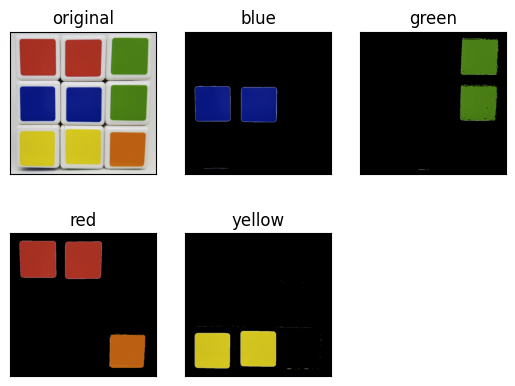

In [29]:
import cv2
import numpy as np
import matplotlib.pylab as plt

#--① 큐브 영상 읽어서 HSV로 변환
img = cv2.imread("../img/cube.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#--② 색상별 영역 지정
blue1 = np.array([90, 50, 50])
blue2 = np.array([120, 255,255])
green1 = np.array([45, 50,50])
green2 = np.array([75, 255,255])
red1 = np.array([0, 50,50])
red2 = np.array([15, 255,255])
red3 = np.array([165, 50,50])
red4 = np.array([180, 255,255])
yellow1 = np.array([20, 50,50])
yellow2 = np.array([35, 255,255])

# --③ 색상에 따른 마스크 생성
mask_blue = cv2.inRange(hsv, blue1, blue2)
mask_green = cv2.inRange(hsv, green1, green2)
mask_red = cv2.inRange(hsv, red1, red2)
mask_red2 = cv2.inRange(hsv, red3, red4)
mask_yellow = cv2.inRange(hsv, yellow1, yellow2)

#--④ 색상별 마스크로 색상만 추출
res_blue = cv2.bitwise_and(img, img, mask=mask_blue)
res_green = cv2.bitwise_and(img, img, mask=mask_green)
res_red1 = cv2.bitwise_and(img, img, mask=mask_red)
res_red2 = cv2.bitwise_and(img, img, mask=mask_red2)
res_red = cv2.bitwise_or(res_red1, res_red2)
res_yellow = cv2.bitwise_and(img, img, mask=mask_yellow)

#--⑤ 결과 출력
imgs = {'original': img, 'blue':res_blue, 'green':res_green, 
                            'red':res_red, 'yellow':res_yellow}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,3, i+1)
    plt.title(k)
    plt.imshow(v[:,:,::-1])
    plt.xticks([]); plt.yticks([])
plt.show()


In [45]:
import cv2
import numpy as np

#--① PNG 파일 읽기
img = cv2.imread('../img/sad_icon.png')  # 원본 PNG 파일 (알파 채널 없음)

#--② 알파 채널 추가 (모든 픽셀을 완전히 불투명하게 설정)
height, width, channels = img.shape
alpha_channel = np.ones((height, width), dtype=np.uint8) * 255  # 알파 채널을 255로 설정하여 불투명하게 만듭니다

#--③ BGR 이미지를 BGRA로 변환
img_bgra = np.dstack((img, alpha_channel))  # 기존 이미지에 알파 채널을 추가합니다

#--④ 새로운 PNG 파일로 저장
cv2.imwrite('sad_icon.png', img_bgra)


True

In [ ]:
1. 확실하게 배경없는 png 구하기
2. 알파 채널 없으면 추가하기. 배경으로 투명으로 설정하기
3. 

In [66]:
import cv2
import numpy as np

# 이미지 읽기 (알파 채널이 없는 이미지)
img = cv2.imread('../img/orange.png')

# 배경 색상 (예: 흰색 배경을 투명하게 처리)
background_color = [255, 255, 255]  # BGR 형식 (흰색)
tolerance = 10  # 색상 허용 오차

# 이미지 크기
h, w = img.shape[:2]

# 알파 채널 초기화 (모든 픽셀을 255로 설정하여 불투명하게 시작)
alpha_channel = np.ones((h, w), dtype=np.uint8) * 255

# 색상 범위 설정 (색상 허용 오차를 포함)
lower_bound = np.array(background_color) - tolerance
upper_bound = np.array(background_color) + tolerance

# 배경 색상 범위와 일치하는 픽셀을 찾기
background_mask = cv2.inRange(img, lower_bound, upper_bound)

# 배경 색상 부분을 알파 채널에서 0으로 설정하여 투명하게 처리
alpha_channel[background_mask > 0] = 0

# 이미지와 알파 채널을 결합
img_bgra = cv2.merge((img, alpha_channel))

# 결과를 저장 (PNG 형식으로)
cv2.imwrite('../img/orange.png', img_bgra)

# 결과 출력
cv2.imshow('Image with Transparent Background', img_bgra)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# img.shape(높이, 너비, 채널 수)

# 흑백 이미지(높이, 너비)
# 컬러 이미지(높이, 너비, 채널 수)
# 보통 채널 수는 3 (bgr)
# 알파 채널이 포함된 이미지(높이, 너비, 4)

In [69]:
img.shape

(102, 100, 3)

In [71]:
img_fg = cv2.imread('../img/orange.png', cv2.IMREAD_UNCHANGED)

In [72]:
img_fg.shape

(102, 100, 4)

In [73]:
img_fg[:,:,(3)]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [74]:
img_fg_4channel=img_fg[:,:,(3)]

In [75]:
np.unique(img_fg_4channel)

array([255], dtype=uint8)

In [78]:
img_fg[:,:,(2)]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [79]:
import cv2
import numpy as np

#--① 합성에 사용할 영상 읽기, 전경 영상은 4채널 png 파일
img_fg = cv2.imread('../img/orange.png', cv2.IMREAD_UNCHANGED)
img_bg = cv2.imread('../img/siro.jpg')

#--② 알파채널을 이용해서 마스크와 역마스크 생성
_, mask = cv2.threshold(img_fg[:,:,(2)], 1, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

#--③ 전경 영상 크기로 배경 영상에서 ROI 잘라내기
img_fg = cv2.cvtColor(img_fg, cv2.COLOR_BGRA2BGR)
h, w = img_fg.shape[:2]
roi = img_bg[10:10+h, 10:10+w ]

#--④ 마스크 이용해서 오려내기
masked_fg = cv2.bitwise_and(img_fg, img_fg, mask=mask)
masked_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)

#--⑥ 이미지 합성
added = masked_fg + masked_bg
img_bg[10:10+h, 10:10+w] = added

cv2.imshow('mask', mask)
cv2.imshow('mask_inv', mask_inv)
cv2.imshow('masked_fg', masked_fg)
cv2.imshow('masked_bg', masked_bg)
cv2.imshow('added', added)
cv2.imshow('result', img_bg)
cv2.waitKey()
cv2.destroyAllWindows() 